# Transfer Learning de l'étude de Chen et Al. 2013

#### Objectif de l'étude


Nous allons explicité comment est obtenu l'estimateur par transfert de cette étude. Comme dans les autres études, on veut combiner les régressions linéaires issues de deux sources de données. Un petit ensemble de données possédant des  observations de hautes qualité et coûteuses et un grand ensemble de données contenant moins de données coûteuses. Le but sera de faire des prédictions sur le petit ensemble de données de haute qualité en utilisant le second ensemble de données plus grand mais potentiellement biaisé. L'application concrète de cette étude se déroule au sein de Google, où il s'agit de faire des prédictions sur une population à partir d'un petit échantillon de consommateurs, qui sont sélectionnés et rémunérés pour partager leurs données de navigation sur Internet et de télévision. Le grand échantillon de consommateur provenant d'une autre population à accepter librement le processus de collecte de données. Si le grand ensemble de données est complètement différents du petit alors il ne sert à rien de l'utiliser. Il doit être similaire mais pas nécessairement identique au petit. Par conséquent utiliser le grand ensemble de données peut s'avérer avantageux même s'il comporte le risque d'introduire un certain biais. L'idée est de recueillir certaines informations issues de l'ensemble de données le plus grand afin d'enrichir l'analyse sur l'ensemble de données le plus petit tout en minimisant l'introduction du biais.

#### Contexte théorique et méthodes de calcul de l'estimateur par transfert

Le modèle de régression pour le petit ensemble de données est donné par : $$Y_i=X_i\beta + \epsilon_i,$$ \ $i\in T$, $\beta \in \mathbb{R}^{D}$ et $\epsilon_i$ de moyenne $0$ et de variance $\sigma_T^{2}$. 
Ensuite on suppose que les données du grand ensemble de données suivent : $$Y_i=X_i(\beta+\gamma) + \epsilon_i$$ $i \in S$ et $\gamma \in \mathbb{R}^{D}$ est un paramètre de biais qui représente la différence entre les coefficients de régression des deux ensembles de donnée, les $\epsilon_i$ sont indépendants de moyenne 0 et de variance $\sigma_S^{2}$. Les tailles d'échantillons sont comme précédemment $N_T$ pour le petit et $N_S$ pour le grand. On peut aussi définir comme précédemment $X_S \in \mathbb{R}^{N_S \times D}$ et $X_T \in \mathbb{R}^{N_T \times D}$ ayant des lignes faient de vecteurs $X_i$ pour $i \in S$ et $i \in T$ respectivement. De même, on a $Y_S \in \mathbb{R}^{N_S}$ et $Y_T \in \mathbb{R}^{N_T}$ les vecteurs correspondants des valeurs de réponse. On pose comme précédemment  $\Sigma_S=X_S^\top X_S$ et $\Sigma_T=X_T^\top X_T$. Il existe deux approches pour obtenir l'estimateur par transfert. Comme dans les deux études précédente, le petit ensemble de donnée est l'ensemble cible et le grand ensemble de donnée est l'ensemble source.

- La première consiste à regrouper les données en mettant une pénalité sur $\gamma$. Puis on estime $\beta_{TL}$ et $\gamma$ en minimisant : $$\sum_{i \in T} (Y_i - X_i \beta)^2 + \sum_{i \in S} (Y_i - X_i (\beta + \gamma))^2 + \lambda P(\gamma)
$$ où $\lambda \in [0, \infty)
$ et $P(\gamma) \geq 0$ est une fonction de pénalité qui peut être $\|X_T \gamma \|_2^{2} $, $\|X_T \gamma \|_1^{2} $, $\|\gamma \|_2^{2} $ ou encore $\|\gamma \|_1^{2} $. On rappelle que le paramètre $\gamma$ mesure le degré de différence entre les coefficients de régression du grand ensemble de données et ceux du petit ensemble de données. En pénalisant $\gamma$, on essaie de contrôler cette différence, ce qui permet d'intégrer le grand ensemble de données tout en limitant le biais potentiel introduit par ce  dernier. 
- La seconde approche étroitement lié est d'estimée $\hat{\beta}_S$ en minimisant $\sum_{i \in S} (Y_i - X_i \beta_S)^2$, estimé $\hat{\beta}_T$ en minimisant $\sum_{i \in T} (Y_i - X_i \beta_T)^2$ puis d'estimer $\beta_{TL}$ par $\hat{\beta}_{TL}=\omega\hat{\beta}_T + (1-\omega)\hat{\beta}_S$ pour un certain $0 \leq \omega \leq 1 $.

Pour la première méthode nous présenterons la démarche permettant d'obtenir l'estimateur par transfert et pour la seconde méthode nous montrerons comment est obtenu l'estimation de $\omega$. 

#### Démarche conduisant à l'estimateur par transfert

Il est garanti par le lemme 2.1 de l'étude de Chen et que si $X_T$ et $X_S$ sont de rang D, alors pour tout $\lambda \geq 0$, $\hat{\beta}_{TL}$ satisfait : $$\hat{\beta}_{TL}=W_{\lambda}\hat{\beta}_T + (\mathbf{I}_D - W_{\lambda})\hat{\beta}_S$$ avec $$W_{\lambda}=(\Sigma_T + \lambda \Sigma_T + \lambda \Sigma_S)^{-1}(\Sigma_S + \lambda \Sigma_T).$$ Dans l'expression précédente, on voit qu'il nous reste $\lambda$ comme seule valeur inconnu  pour pouvoir obtenir $\hat{\beta}_{TL}$. On va l'estimer dans la suite par le biais d'une méthode plug-in. La  mean square error prédictive est donnée par : $$\text{MSE} = \mathbb{E} \left( \| X_S(\hat{\beta} - \beta) \|^2 \right) = \sigma_S^2 \sum_{j=1}^{D} \frac{(1 + \lambda \nu_j)^2}{(1 + \lambda + \lambda \nu_j)^2} + \sum_{j=1}^{D} \frac{\lambda^2 \kappa_j^2}{(1 + \lambda + \lambda \nu_j)^2}.$$ L'estimateur plug-in de $\lambda$ est choisi en minimisant cette mean square error prédictive et il est donné par : $$\hat{\lambda} = \arg \min_{\lambda \geq 0} \sum_{j=1}^D \frac{\hat{\sigma}^2_T(1 + \lambda \nu_j)^2 + \lambda^2 \hat{\kappa}^2_j}{(1 + \lambda + \lambda \nu_j)^2}$$  avec $\hat{\sigma}^2_T = \frac{\|Y_T - X_T \hat{\beta}_T\|^2}{N_T - D}$, $\hat{\kappa}_j^2 = u_j^T \Sigma_T^{1/2} \hat{\Theta} \Sigma_T^{1/2} u_j$ avec $u_j$ et $\nu_j$ provenant de la décomposition propre de la matrice $M \equiv \Sigma_T^{1/2} \Sigma_S^{-1} \Sigma_T^{1/2}$,
$\hat{\Theta}$ donné par   $\hat{\Theta}_{\text{plug}} = \hat{\gamma}\hat{\gamma}^T + \hat{\sigma}^2_S \Sigma^{-1}_S$ où $\hat{\gamma} = \hat{\beta}_S - \hat{\beta}_T$. \\Il peut également être utilisé pour estimer $\lambda$ l'estimation plug-in en biais ajusté de $\Theta$ donné par : $$\hat{\Theta}_{\text{bapi}} = \hat{\sigma}^2_S \Sigma^{-1}_S + (\hat{\gamma}\hat{\gamma}^T - \hat{\sigma}^2_S \Sigma^{-1}_S - \hat{\sigma}^2_T \Sigma^{-1}_T)_+, $$ où l'opérateur $+$ ici désigne une transformation de la matrice $(\hat{\gamma}\hat{\gamma}^T - \hat{\sigma}^2_S \Sigma^{-1}_S - \hat{\sigma}^2_T \Sigma^{-1}_T)$.  Cette transformation consiste à diagonaliser la matrice, puis à modifier ses valeurs propres en conservant uniquement celles qui sont positives et en remplaçant les valeurs propres négatives par $0$. Après cela, la matrice est reconstruite à partir de ces nouvelles valeurs propres. \\Ainsi par la première approche on obtient :
$$\hat{\beta}_{TL}=W_{\hat{\lambda}}\hat{\beta}_T + (\mathbb{I}_D - W_{\hat{\lambda}})\hat{\beta}_S$$

Il existe plusieurs estimations considérés pour $\omega$. Nous en présentons trois ici. 

- La première est donnée par : $$\hat{\omega}_{\text{plug}}= (\hat{\delta}_0^{2} + \hat{\sigma}_S^{2}/N_S)(\hat{\delta}_0^{2} + \hat{\sigma}_S^{2}/N_S + \hat{\sigma}_T^{2}/N_T )$$ où $\hat{\delta}_0=\bar{Y}_S - \bar{Y}_T$, $\sigma_T^{2}=\frac{1}{N_T} \sum_{i \in T} (Y_i - \bar{Y}_T)^2$ et $\sigma_S^{2}=\frac{1}{N_S} \sum_{i \in T} (Y_i - \bar{Y}_S)^2$. 
- La seconde par : $$\hat{\omega}_{bapi}=\frac{\hat{\theta}_{bapi}}{\hat{\theta}_{bapi} + \hat{\sigma}_T^{2}/N_T}$$ où $\hat{\theta}_{bapi}=\frac{\hat{\sigma}_S^{2}}{N_S} +(\hat{\delta}_0^{2} - \frac{\hat{\sigma}_T^{2}}{N_T} - \frac{\hat{\sigma}_S^{2}}{N_S})_+$. 
- Et la troisième estimation de $\omega$ est donnée par : $$\hat{\omega}_{cv}=\arg \min_{\omega \in [0, 1]} \frac{1}{K} \sum_{k=1}^{K}(\bar{Y}_{T,k} - \omega \bar{Y}_{T,-k} - (1- \omega)\bar{Y}_S)^{2}$$ où $\bar{Y}_{T,k}$ est la moyenne de $Y_i$ sur la $kième$ partie de $T$ et $\bar{Y}_{T,-k}$ est la moyenne de $Y_i$ sur les $K-1$ parties restantes.

Puis en fonction de l'estimation choisi pour $\omega$ on aura : $$\hat{\beta}_{TL}=\hat{\omega}\hat{\beta}_T + (1-\hat{\omega})\hat{\beta}_S$$

En pratique on préférera utiliser la première approche car elle permet d'ajuster le modèle par transfert aux deux ensemble de données tout en minimisant la différence entre les deux modèles source et cible. Toutefois la seconde approche marche aussi très bien et offre des résultats quasi-similaire à la première. Le modèle associé à l’approche de Chen est le modèle $M_c$ et dans la suite on note par $\hat{\beta}_c$
l’estimateur $\hat{\beta}_{TL}$ obtenu précédemment.

Le code ci-dessous éffectue le programme permettant d’obtenir l’estimateur par transfert de l’étude de Chen
et Al. 2013 puis trace l’estimation du polynome cible de l’étude de Obst et Al. 2022 en utilisant
l’estimateur par transfert de l’étude de Chen et Al. 2013.

#### Chargement des librairies et modèles de régression source et cible pour l’étude

In [1]:
import numpy as np
import random
import math as m
import matplotlib.pyplot as plt
from scipy.linalg import schur

In [2]:
#conception of the target model
Nt=20
D=4
sigma_t=0.5
betat0=-1
betat1=-1.8
betat2=1.2
betat3=1
X_t=np.ones((Nt,D))
x_t=np.ones((Nt,1))
random.seed(a=256, version=2)
for i in range(0,Nt):
    x_t[i,0]=-4*random.random()+1
for j in range(1,D):
    for i in range(0,Nt):
        if j==1:
            X_t[i,j]=x_t[i,0]
        elif j==2:
            X_t[i,j]=(x_t[i,0])**2
        else:
            X_t[i,j]=(x_t[i,0])**3
big_sigma_t=np.matmul(np.transpose(X_t),X_t)
random.seed(a=255, version=2)
epsilon_t=np.ones((Nt,1))
for i in range(Nt):
    epsilon_t[i,0]=random.normalvariate(mu=0.0, sigma=m.sqrt(sigma_t))
beta_t=np.array([[betat0],[betat1],[betat2],[betat3]])
Y_t=X_t@beta_t+epsilon_t

In [3]:
#conception of the source model
Ns=100
D=4
sigma_s=0.5
X_s=np.ones((Ns,D))
x_s=np.ones((Ns,1))
random.seed(a=254, version=2)
for i in range(0,Ns):
    x_s[i,0]=3*random.random()
for j in range(1,D):
    for i in range(0,Ns):
        if j==1:
            X_s[i,j]=x_s[i,0]
        elif j==2:
            X_s[i,j]=(x_s[i,0])**2
        else:
            X_s[i,j]=(x_s[i,0])**3
big_sigma_s=np.matmul(np.transpose(X_s),X_s)
random.seed(a=253, version=2)
epsilon_s=np.ones((Ns,1))
for i in range(Ns):
    epsilon_s[i,0]=random.normalvariate(mu=0.0, sigma=m.sqrt(sigma_s))
random.seed(a=252, version=2)
beta_s=np.array([[betat0 + random.normalvariate(mu=0.0, sigma=0.3)],[betat1 +random.normalvariate(mu=0.0, sigma=0.3) ],[betat2 + random.normalvariate(mu=0.0, sigma=0.3) ],[betat3 + random.normalvariate(mu=0.0,sigma=0.3) ]])
Y_s=X_s@beta_s+epsilon_s

In [4]:
#split betwenn train set and test set
X_t_train=X_t[0:10,:]
Y_t_train=Y_t[0:10]
Nt_train=np.shape(X_t_train)[0]
X_t_test=X_t[10:21,:]
Y_t_test=Y_t[10:21]
Nt_test=np.shape(X_t_test)[0]

#### Estimateur par transfert de l’étude de Chen et Al. 2013

In [5]:
X_ss=X_t_train
X_b=X_s
Y_b=Y_s
Y_ss=Y_t_train
n=Nt_train
N=Ns
d=D
V_b=np.transpose(X_s)@X_s
V_s=np.transpose(X_t_train)@X_t_train
beta_chap_b=np.linalg.inv(V_b)@np.transpose(X_s)@Y_s
beta_chap_s=np.linalg.inv(V_s)@np.transpose(X_t_train)@Y_t_train
sigma_chap_carre_b=np.linalg.norm(Y_s - X_b@beta_chap_b,ord=2)**2/(N-d)
sigma_chap_carre_s=np.linalg.norm(Y_t_train - X_t_train@beta_chap_s,ord=2)**2/(n-d)
gamma_chap=beta_chap_b - beta_chap_s
big_theta_chap=gamma_chap@np.transpose(gamma_chap) + sigma_chap_carre_b*np.linalg.inv(V_b)
#C=(gamma_chap@np.transpose(gamma_chap) + sigma_chap_carre_b*np.linalg.inv(V_b)- sigma_chap_carre_s*np.linalg.inv(V_s))
#C_val , C_vect =np.linalg.eig(C)
#for i in range(len(C_val)):
#if C_val[i]<0:
#C_val[i]=0
#C=C_vect@np.diag(C_val)@np.linalg.inv(C_vect)
#print(C_val)
#big_theta_chap=sigma_chap_carre_b*np.linalg.inv(V_b) + C
val , vect = np.linalg.eig(V_s)
diag=np.diag(np.sqrt((val)))

V_s_decomp_sqrt = vect @ diag @ np.linalg.inv(vect)
M=V_s_decomp_sqrt@np.linalg.inv(V_b)@V_s_decomp_sqrt
#M=(1/2)*(M + M.T)
D , U = np.linalg.eig(M)
k_chap_carre=np.ones(len(U))
for i in range(len(U)):
    k_chap_carre[i]=U[i]@V_s_decomp_sqrt@big_theta_chap@V_s_decomp_sqrt@U[i]
L=[]
for lamda in np.arange(0,1000):
    s=0
    for j in range(len(k_chap_carre)):
        s+=(sigma_chap_carre_s*(1+lamda*D[j])**2 + lamda**2 * k_chap_carre[j])/(1 + lamda + lamda*D[j])**2
    L.append(s)
lambda_chap=L.index(min(L))
#print(np.arange(0,1000)[L.index(min(L))])
W_lambda=np.linalg.inv(V_b + lambda_chap*V_s + lambda_chap*V_b)@(V_b +lambda_chap*V_s)
beta_chen=W_lambda@beta_chap_s + (np.eye(d)-W_lambda)@beta_chap_b

#### Tracé sur le polynome cible de l’étude de Obst et Al. 2022

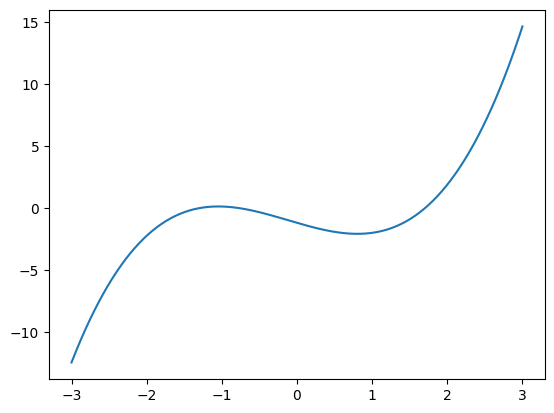

In [6]:
 x = np.linspace(-3, 3, 400)
y_estim_by_M2=beta_chen[0] + beta_chen[1]*x + beta_chen[2]*x**2 +beta_chen[3]*x**3
plt.plot(x,y_estim_by_M2)